# LIFE EXPECTANCY GDP
This work is the *data vizualization portfolio project* for *Codecademy Data Scientist path*.
The data given for developing the project are *life expectancy* and *gross domestic product* (GDP) from the *World Health Organization* (WHO) records.\
For better understanding the meaning of each variable it is suggested to look at Wikipedia's pages for [GDP](https://en.wikipedia.org/wiki/Gross_domestic_product) and [life expectancy](https://en.wikipedia.org/wiki/Life_expectancy).

Before stating the scope of the project it is important to look at the available data.

## Exploratory Data Analysis
Data are provided by *Codecademy* as part of the project in a file named `all_data.csv`.
Before looking at the actual data, relevant packages have to be imported.

### Import Statements

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import kendalltau
from scipy.stats import ttest_ind

### Load CSV
Now we are ready for loading the csv in `WHO_df` dataframe with `pd.read_csv`.
For an improved readability let's rename the `Life expectancy at birth (years)` to a more friendly `Life_Exp`.

In [12]:
WHO_df = pd.read_csv('all_data.csv')
WHO_df.rename(columns={'Life expectancy at birth (years)': 'Life_Exp'}, inplace=True)
display(WHO_df.head(10).style
        .format({'Year': "{:.0f}", 'Life_Exp': "{:.1f}", 'GDP': "{:.2e}"}))

,Country,Year,Life_Exp,GDP
0,Chile,2000,77.3,7.79e+10
1,Chile,2001,77.3,7.10e+10
2,Chile,2002,77.8,6.97e+10
3,Chile,2003,77.9,7.56e+10
4,Chile,2004,78.0,9.92e+10
5,Chile,2005,78.4,1.23e+11
6,Chile,2006,78.9,1.55e+11
7,Chile,2007,78.9,1.74e+11
8,Chile,2008,79.6,1.80e+11
9,Chile,2009,79.3,1.72e+11


### Descriptive Statistic
We can then look at some descriptive statistical values.

In [3]:
display(WHO_df.Country.value_counts().to_frame().style.set_caption('Available countries'))
display(WHO_df.describe().style
        .format({'Year': "{:.0f}", 'Life_Exp': "{:.1f}", 'GDP': "{:.2e}"})
        .set_caption('Descriptive values'))

,Country
United States of America,16
China,16
Chile,16
Mexico,16
Zimbabwe,16
Germany,16


,Year,Life_Exp,GDP
count,96,96.0,9.60e+01
mean,2008,72.8,3.88e+12
std,5,10.7,5.20e+12
min,2000,44.3,4.42e+09
25%,2004,74.5,1.73e+11
50%,2008,76.8,1.28e+12
75%,2011,78.9,4.07e+12
max,2015,81.0,1.81e+13


There are **six** countries with 16 years of records (from 2000 to 2015).
*Average life expectancy* is 72 year but looking at quartiles it is noticeable that the average value is probably affected by one or more countries with a low *life expectancy*.\
Also *GDP* distribution has at least one country with very low values (see the **min** row), being the interquartile range in beween $10^{11}$ and $10^{12}$.

### Overall View

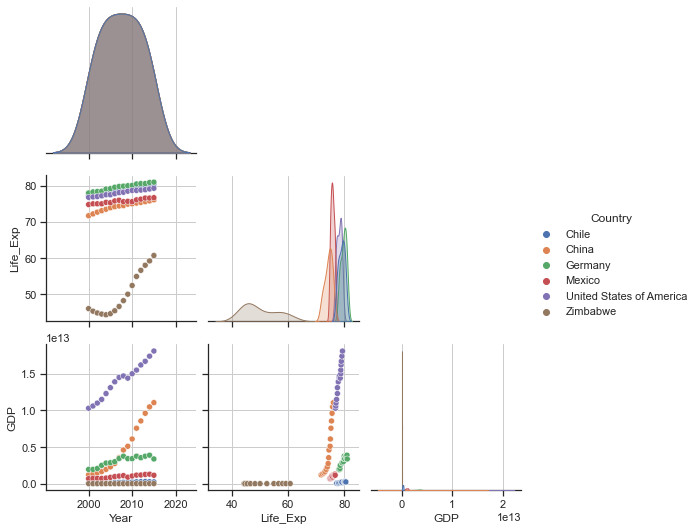

In [4]:
# Theme preferences
sns.set_theme(style='ticks', rc={'axes.grid': True})

# Pairplot
sns.pairplot(WHO_df, hue='Country', corner=True)
plt.show()

A second plot without *Zimbabwe* highlights differences between other nations.

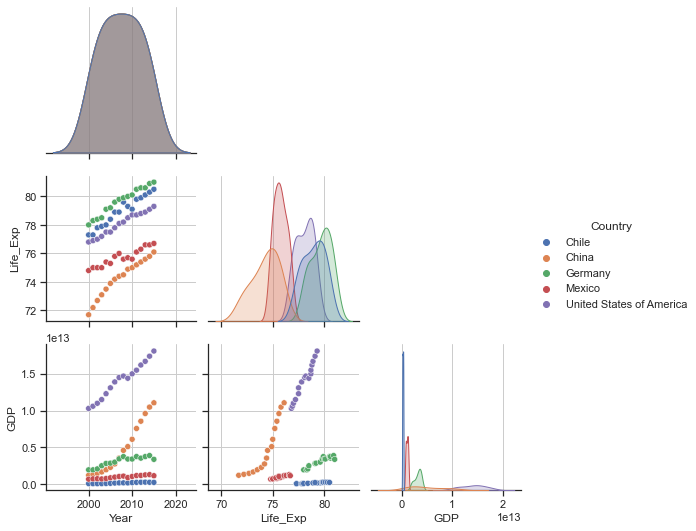

In [5]:
# Pairplot without Zimbabwe
sns.pairplot(WHO_df[WHO_df.Country != 'Zimbabwe'], hue='Country', corner=True)
plt.show()

Looking at variables densities and paired scatterplot it is possible to notice that:
- Zimbawe had a profound crisis which affected GDP and life expectancy (more info [here](https://en.wikipedia.org/wiki/History_of_Zimbabwe))
- America and China show the same positive trend, albeit China's one is delayed by some years of difference.
- Even if Germany has a lower GDP, life expectancy is better than America and China: this fact suggests that a whealthier economy usually reveal an improved life expectancy, but other factors may have an effect
- Chile is another country with a low GDP but a relatively high life expectancy
- Mexico shows intermediate values both in term of GDP and life expectancy
- It seems that China's economy is flourishing but the healthcare is not at the same level of other nations

It is evident that a florid economy improve overall health conditions, but other cultural factors may have an important influence.
Let's compare *Germany and Chile* with *America and China*.\
*Germany* for example developed an efficient national insurance based healthcare system, without the imbalances of the American system. *USA* healthcare is more influenced by economic status: access to better medical cares is easier for wealthy people. The German system has some strong guarantees to tutelate also people with fragile financial means.\
Also cultural differences, eating habits and a less sedentary lifestyle play a role too.\
*Chile* probably records a better life expectancy than *USA* thanks to healthier habits in term of diet and fitness, rather than an improved infrastructure (although [Chilean healthcare](https://en.wikipedia.org/wiki/Healthcare_in_Chile) is historically one of the best in Latin America).

## Project Scope
We would like to asses **if there is a correlation between GDP and life expectancy**, and we want to find out how strong this relationship is.\
In addition we would like to know if **life expectancy is statistically different between wealthy countries and the ones with a lower GDP**.

We expect that a correlation is proven, although it may be weaker than we would imagine.\
Statistical significance of *life expectancy* is less predictable since some nations contradict the hypothesis that an higher *GDP* is connected to a better *life expectancy*.

### Correlation between GDP and life expectancy
Since GDP and life expectancy are non-normal, the *Kendall $\tau$* correlation coefficient (`kendalltau`) is used for measuring correlation.\
Normality is tested with `normaltest` from `scipy.stats`.

In [6]:
# Normality test
_, p_val_GDP = normaltest(WHO_df.GDP)
_, p_val_Exp = normaltest(WHO_df.Life_Exp)

Norm_Test = pd.DataFrame({'p_value': [p_val_GDP, p_val_Exp]},index=['GDP', 'Life Expectation'])
alfa = 0.05
Norm_Test['Normality'] = Norm_Test.p_value.apply(lambda x: 'Rejected' if x<alfa else 'Accepted')

display(Norm_Test.style.set_caption('Normality test with confidence @ 95%'))

,p_value,Normality
GDP,0.000007,Rejected
Life Expectation,0.000000,Rejected


After verifying that *GDP* and *life expectation* have non-normal distributions, *Kendall $\tau$* is evaluated.

In [7]:
# Kendall Tau
corr, p_val = kendalltau(WHO_df.GDP, WHO_df.Life_Exp)
print(f'KENDALL TAU: {corr:.3f}\np-value: {p_val:.3e}')

KENDALL TAU: 0.370
p-value: 9.925e-08


The *Kendall $\tau$* highlights a *correlation* between the two variables.\
Values of $\tau$ close to 1 mean strong agreement, while values close to -1 indicate strong disagreement.\
A **moderate agreement** is thus found **between `GDP` and `Life_Exp`**: the following scatter plot agree with this conclusion.

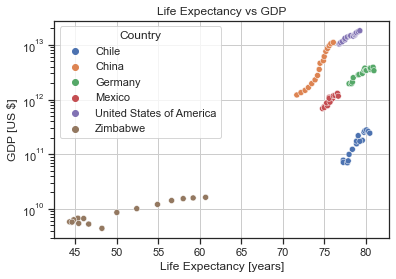

In [8]:
# Scatter plot
sns.scatterplot(data=WHO_df, y='GDP', x='Life_Exp', hue='Country')
plt.yscale('log')
plt.title('Life Expectancy vs GDP')
plt.xlabel('Life Expectancy [years]')
plt.ylabel('GDP [US $]')
plt.show()

An higher GDP seems connected to a better life expectancy, but this is not the only influencing factor.\
*Chile* has a lower *gross domestic product* compared to *USA* or *China*, nevertheless it shows a good life expectancy.\
*Chile*'s life expectancy is comparable with *Germany*'s one, even if *Chile's GDP is 10 times smaller*.\
This fact strengthen the result of a moderate correlation.

### Hypothesis testing: wealthy countries
Does it exist a statistical evidence that nations with higher GDPs have an higher life expectancy?\
This alternative hypothesis is tested by means of a 2 sample t-test:
- **NULL HYPOTHESIS**: nations with an higher GDP do not have a greater life expectancy
- **ALTERNATIVE HYPOTHESIS**: nations with an higher GDP have a greater life expectancy

This test willl compare the following groups:
- `high_GDP`: United States of America, China, Germany
- `low_GDP`: Mexico, Chile

*Zimbabwe* is not included in the `low_GDP` group because its economy and healthcare are affected by the outcome of a recent *civil war*. This condition is not comparable with other nations from the provided dataset.\
Adding this country to the `low_GDP` group would probably *bias* the result of the test towards wealthy nations: [the previous paragraph](#Correlation-between-GDP-and-life-expectancy) analyzed the whole dataset, now we want to focus on countries with similar *external* conditions, in order to have a meaningful comparison.

Since we are interested in recent times, only data from 2015 are considered.

In [9]:
# Divide country by GDP groups
high_GDP = ['United States of America', 'China', 'Germany']
low_GDP = ['Mexico', 'Chile']
high_GDP_df = WHO_df[(WHO_df.Country.isin(high_GDP)) & (WHO_df.Year == 2015)].reset_index(drop=True).copy()
low_GDP_df = WHO_df[(WHO_df.Country.isin(low_GDP)) & (WHO_df.Year == 2015)].reset_index(drop=True).copy()

# Print tables
display(high_GDP_df.style
        .format({'Year': "{:.0f}", 'Life_Exp': "{:.1f}", 'GDP': "{:.2e}"})
        .set_caption('High GDP'))
display(low_GDP_df.style
        .format({'Year': "{:.0f}", 'Life_Exp': "{:.1f}", 'GDP': "{:.2e}"})
        .set_caption('Low GDP'))

# Two sample t-test
alfa = 0.05
t_stat, p_val = ttest_ind(high_GDP_df.Life_Exp, low_GDP_df.Life_Exp)
result = ('significant:\nnations with an higher GDP have an higher life expectancy.' 
          if (p_val/2 < alfa) & (t_stat > 0) else 
          'not significant:\nthere is no evidence that nations with an higher GDP have an higher life expectancy.')

print(f'\n2-sample t-test is {result}\n')
print(f'Significance level: {alfa}')
print(f'p-value: {p_val:.2e}')
print(f't-statistic: {t_stat:.2f}')

,Country,Year,Life_Exp,GDP
0,China,2015,76.1,1.11e+13
1,Germany,2015,81.0,3.38e+12
2,United States of America,2015,79.3,1.81e+13


,Country,Year,Life_Exp,GDP
0,Chile,2015,80.5,2.43e+11
1,Mexico,2015,76.7,1.15e+12



2-sample t-test is not significant:
there is no evidence that nations with an higher GDP have an higher life expectancy.

Significance level: 0.05
p-value: 9.37e-01
t-statistic: 0.09


The *alternative hypothesis* is *rejected*. The following boxplot confirms this result.

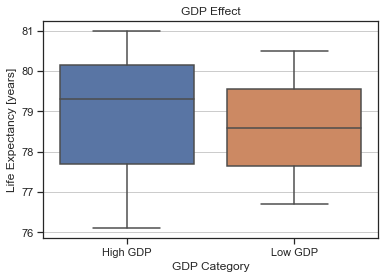

In [10]:
# Aggregate dataframes
wealth_df = pd.concat([high_GDP_df, low_GDP_df])
wealth_df['GDP_Cat'] = None
wealth_df.loc[wealth_df.Country.isin(high_GDP), 'GDP_Cat'] = 'High GDP'
wealth_df.loc[wealth_df.Country.isin(low_GDP), 'GDP_Cat'] = 'Low GDP'

# Boxplot
sns.boxplot(data=wealth_df, x='GDP_Cat', y='Life_Exp')
plt.title('GDP Effect')
plt.xlabel('GDP Category')
plt.ylabel('Life Expectancy [years]')
plt.show()

The two boxplots are really similar in term of *interquartile range* and median. Whiskers of wealthy countries are more extended than the ones of countries with lower GDP: this is a consequence of *Germany* and *China* life expectancies (which show respectively high and low values).

## Conclusions
The gross domestic product is related to the overall wealth generated by the economy of a country.\
A florid economy attracts investors: the consequent availability of funds may lead to a better healthcare.\
A constant flux of money is not sufficient though. Authorities have to set a clear investment strategy for the system to work efficiently. If a nation focus properly its efforts and investments, it could achieve better performances than wealthier nations, in terms of medical cares (e.g. *Germany*).
In addition wrong habits can undermine the effectiveness of a good infrastructure with the result that unexpected countries can outperform wealthier nations just by exploiting an healty cultural context (this may be the case of *Chile* showing better results than *USA* in term of *life expectancy*).

**Life expectancy and GDP are correlated but there is much more to consider when looking at healthcare.**

In fact the hypothesis test resulted in a not-significant difference between two comparable groups of nations (low GDPs vs high GDPs).\
It worth mention that all nations included in *Codecademy* dataset are relatively similar, with *Zimbabwe* being the only exception.\
It is the only African country in our dataframe.

Take a look at the following image (from Wikipedia) with world's GDPs for 2014:

![GDP_Wiki](https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Countries_by_GDP_%28Nominal%29_in_2014.svg/1920px-Countries_by_GDP_%28Nominal%29_in_2014.svg.png)

**Africa has the highest concentrations of countries with really low GDPs** (and Zimbabwe is among them).\
We should have had more countries similar to *Zimbabwe* to have a complete picture of the relationship between *GDP* and *life expectancy*.
This is the reason why *Zimbabwe* has been removed from the `low_GDP` group in "[Hypothesis testing: wealthy countries](#Hypothesis-testing:-wealthy-countries)".\
We decided to see if a difference existed between countries that are similar from a socio-political point of view, instead than highlighting the (obvious) effect of *Zimbabwe* over the `low_GDP` group (you can try to run the hypothesis test with *Zimbabwe* included in the `low_gdp_df` to see if the result changes).

We have seen that **no evidence of statistical difference exists between the selected groups** in term of *life expectancy*: note that Germany, China, USA, Chile and Mexico are *relatively* similar in term of color in 2014 GDP map, even if the difference in therm of value is meaningful (*German* GDP is twice as high as *Mexican* one).\
We do not know if by including nations with an higher gap in GDP may highlight a relevant difference in term of *life expectancy* (like *Zimbabwe* case suggests).

The following violin plot gives an idea of the divide between *third world countries* like *Zimbabwe* and the rest of the world.

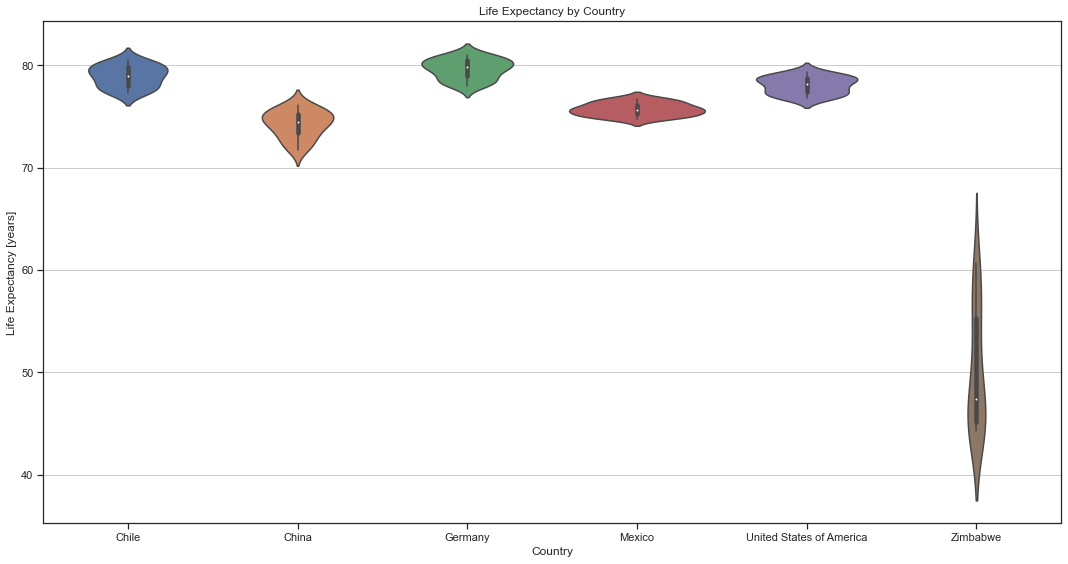

In [11]:
plt.figure(figsize=[15, 8])
sns.violinplot(data=WHO_df, x='Country', y='Life_Exp')
plt.title('Life Expectancy by Country')
plt.ylabel('Life Expectancy [years]')
plt.tight_layout()
plt.show()

To obtain more significative results we should broaden the analysis by including an ample variety of countries, at least by improving the number of nations belonging to *third world countries*.